In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./dataset/Salary_Data.csv.xls')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


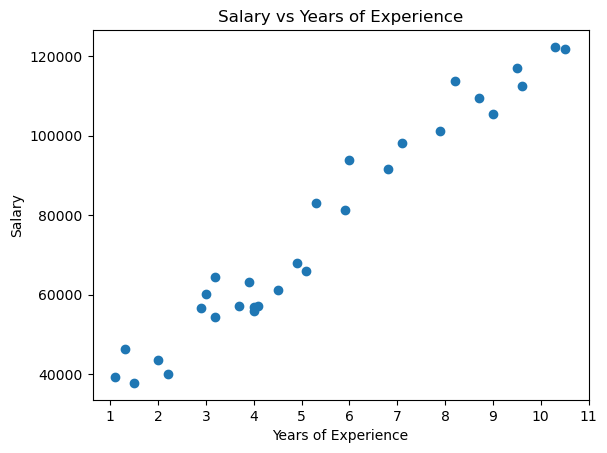

In [3]:
plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
# put the xtick from 1 to 12 and I want to see the 0.5 values
plt.xticks(np.arange(1, 12, 1))
plt.show()

In [4]:
# Create a linear regression model using numpy
reg_line = np.polyfit(data['YearsExperience'], data['Salary'], 1)
reg_line

array([ 9449.96232146, 25792.20019867])

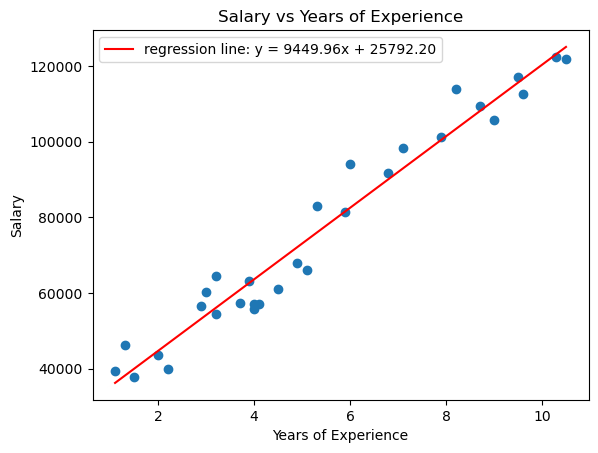

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./dataset/Salary_Data.csv.xls')

# Convert columns to arrays or Series
x = data['YearsExperience'].values
y = data['Salary'].values

# Create a linear regression model using numpy
reg_line = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, reg_line[0] * x + reg_line[1], color='red', label=f"regression line: y = {reg_line[0]:.2f}x + {reg_line[1]:.2f}")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()



# My own Linear regression

## Dataset

In [6]:
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
print(x.shape, y.shape)

(30, 1) (30, 1)


In [7]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
X

array([[ 1.1,  1. ],
       [ 1.3,  1. ],
       [ 1.5,  1. ],
       [ 2. ,  1. ],
       [ 2.2,  1. ],
       [ 2.9,  1. ],
       [ 3. ,  1. ],
       [ 3.2,  1. ],
       [ 3.2,  1. ],
       [ 3.7,  1. ],
       [ 3.9,  1. ],
       [ 4. ,  1. ],
       [ 4. ,  1. ],
       [ 4.1,  1. ],
       [ 4.5,  1. ],
       [ 4.9,  1. ],
       [ 5.1,  1. ],
       [ 5.3,  1. ],
       [ 5.9,  1. ],
       [ 6. ,  1. ],
       [ 6.8,  1. ],
       [ 7.1,  1. ],
       [ 7.9,  1. ],
       [ 8.2,  1. ],
       [ 8.7,  1. ],
       [ 9. ,  1. ],
       [ 9.5,  1. ],
       [ 9.6,  1. ],
       [10.3,  1. ],
       [10.5,  1. ]])

In [8]:
X.shape

(30, 2)

In [9]:
teta = np.random.randn(2, 1)
teta

array([[1.50974434],
       [0.86772736]])

## Linear model

In [11]:
def model(X, teta):
  return X @ teta

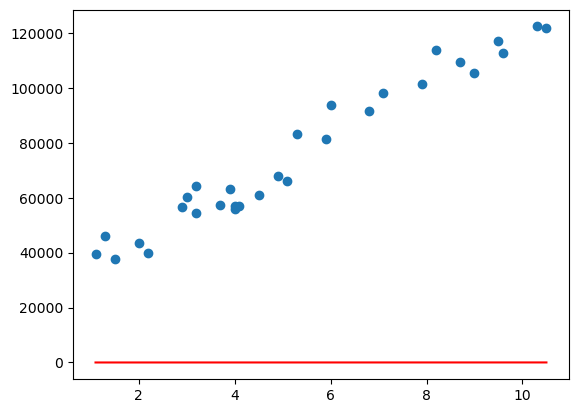

In [12]:
plt.scatter(x, y)
plt.plot(x, model(X, teta), "r")
plt.show()

## Cost function

In [14]:
def cost_function(X, y, teta):
  """
  Calculates the cost of the linear regression model
  Here we use the MSE (Mean Squared Error) cost function
  """
  m = X.shape[0]
  return 1/(2*m) * np.sum((model(X, teta) - y)**2)

In [15]:
cost_function(X, y, teta)

3250690983.8827767

## Gradient descent

In [20]:
def grad(X, y, teta):
  """
  Calculates the gradient of the linear regression model
  """
  m = X.shape[0]
  return 1/m * X.T.dot(model(X,teta)-y)

In [24]:
def gradient_descent(X, y, teta, learning_rate, iterations=100):
  """
  Performs the gradient descent algorithm
  """
  cost_history = np.zeros((iterations, 1))
  for i in range(iterations):
    teta = teta - learning_rate * grad(X, y, teta)
    cost_history[i] = cost_function(X, y, teta)
  return teta, cost_history

## Train model

In [57]:
n_iter = 100000

In [58]:
final_teta, cost_history = gradient_descent(X, y, teta, 0.001, n_iter)
final_teta

array([[ 9449.96232376],
       [25792.20018317]])

## Predict model

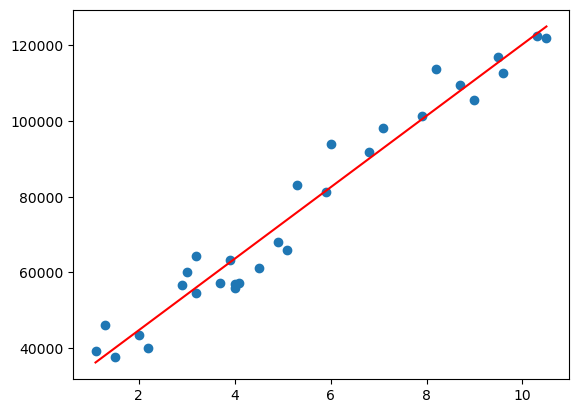

In [59]:
predictions = model(X, final_teta)
plt.scatter(x, y)
plt.plot(x, predictions, "r")
plt.show()

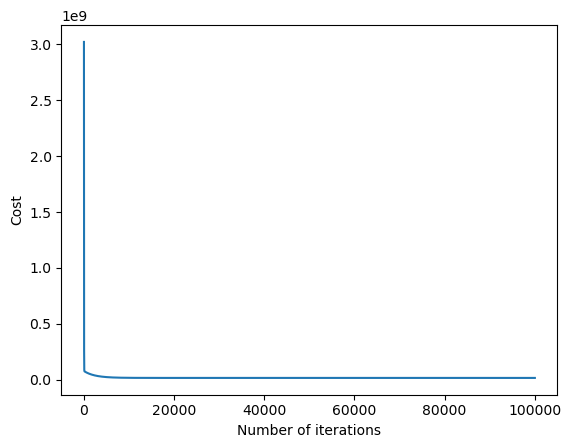

array([15635475.86114049])

In [60]:
plt.plot(range(n_iter), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

cost_history[-1]

## Evaluate model

In [61]:
def r2_score(y, y_pred):
  u = np.sum((y - y_pred) ** 2)
  v = np.sum((y - np.mean(y)) ** 2)
  return 1 - u / v


In [62]:
print(r2_score(y, predictions))

0.9569566641435086


# Multiple Linear Regression

In [65]:
from sklearn.datasets import make_regression

ImportError: dlopen(/Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/_iterative.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib
  Referenced from: <846DFF65-4FFB-38DE-96F0-B03D32D3ADE3> /Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/_iterative.cpython-310-darwin.so
  Reason: tried: '/Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/liblapack.3.dylib' (no such file), '/Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/../../../../../../liblapack.3.dylib' (no such file), '/Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/liblapack.3.dylib' (no such file), '/Users/antonio/miniconda3/envs/nomades_env_course/lib/python3.10/site-packages/scipy/sparse/linalg/_isolve/../../../../../../liblapack.3.dylib' (no such file), '/Users/antonio/miniconda3/envs/nomades_env_course/bin/../lib/liblapack.3.dylib' (no such file), '/Users/antonio/miniconda3/envs/nomades_env_course/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)

In [ ]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)
y = y + abs(y / 2)
y = y.reshape(y.shape[0], 1)
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(x.shape, y.shape)
teta = np.random.randn(2, 1)
plt.scatter(x, y)

In [ ]:
final_teta, cost_history = gradient_descent(X, y, teta, 0.001, n_iter)
final_teta

In [ ]:
predictions = model(X, final_teta)
plt.scatter(x, y)
plt.plot(x, predictions, "r")
plt.show()

In [ ]:
print(r2_score(y, predictions))

In [ ]:
X = np.hstack((x**2, x, np.ones((x.shape[0], 1))))
teta = np.random.randn(3, 1)
print(X.shape, teta.shape)

In [ ]:
final_teta, cost_history = gradient_descent(X, y, teta, 0.001, n_iter)
final_teta

In [ ]:
x[np.argsort(x)].reshape(x.shape[0], 1)

In [ ]:
predictions = model(X, final_teta)
print(predictions.shape)
plt.scatter(x, y)
plt.scatter(x, predictions)
plt.show()

In [ ]:
print(r2_score(y, predictions))

In [ ]:
plt.plot(range(n_iter), cost_history)